# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Conclusions:
Throughout this notebook, at least 500 cities were retrieved and formatted as a data frame with all requirements that were specified in the instructions. CSV and png files were exported as outputs. The only correlation was found between temperature and latitude: temperatures tend to be higher when the latitude is close to zero, meaning temperatures are higher the closer to the equator. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
compcities = []
lat = []
lng = []
tempmax = []
humidity = []
clouds = []
winds = []
countries = []
dates = []
count = 1

# Loop through the list of cities and perform a request for data on each
print('Data Retrieval In Process')
print('------------------------------')
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        tempmax.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        winds.append(response['wind']['speed'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        compcities.append(city)
        print(f"Retrieving City #{count}: {city}.")
        count = count + 1
    except:
        print(f"City {city} not found. Skipping.")
        pass
print('------------------------------')
print('Data Retrieved')
print('------------------------------')

Data Retrieval In Process
------------------------------
Retrieving City #1: ekhabi.
Retrieving City #2: plettenberg bay.
City barentsburg not found. Skipping.
Retrieving City #3: rongcheng.
City vaitupu not found. Skipping.
Retrieving City #4: rikitea.
Retrieving City #5: zarand.
Retrieving City #6: cape town.
City toliary not found. Skipping.
Retrieving City #7: albany.
Retrieving City #8: paamiut.
Retrieving City #9: hobart.
Retrieving City #10: cidreira.
Retrieving City #11: kathmandu.
Retrieving City #12: new norfolk.
Retrieving City #13: mataura.
Retrieving City #14: khandbari.
Retrieving City #15: kupang.
Retrieving City #16: georgetown.
Retrieving City #17: constitucion.
Retrieving City #18: jamestown.
Retrieving City #19: hilo.
Retrieving City #20: bredasdorp.
Retrieving City #21: sadiqabad.
Retrieving City #22: hobyo.
City umzimvubu not found. Skipping.
Retrieving City #23: saint-augustin.
Retrieving City #24: busselton.
Retrieving City #25: severo-kurilsk.
Retrieving City #2

Retrieving City #226: lata.
City grand river south east not found. Skipping.
Retrieving City #227: dingle.
Retrieving City #228: banda aceh.
Retrieving City #229: matoury.
Retrieving City #230: urengoy.
Retrieving City #231: chifeng.
Retrieving City #232: oranjestad.
Retrieving City #233: manuk mangkaw.
Retrieving City #234: zyryanka.
Retrieving City #235: saint george.
Retrieving City #236: sur.
Retrieving City #237: maniitsoq.
Retrieving City #238: belyy yar.
Retrieving City #239: la asuncion.
Retrieving City #240: sao joao da barra.
Retrieving City #241: ankpa.
Retrieving City #242: kavieng.
Retrieving City #243: bressuire.
Retrieving City #244: naze.
Retrieving City #245: emerald.
Retrieving City #246: nouadhibou.
Retrieving City #247: santa maria.
Retrieving City #248: adre.
Retrieving City #249: leh.
Retrieving City #250: souillac.
Retrieving City #251: pisco.
Retrieving City #252: hamada.
Retrieving City #253: myatlevo.
Retrieving City #254: aragats.
Retrieving City #255: jumla.

Retrieving City #460: harboore.
Retrieving City #461: karratha.
Retrieving City #462: faanui.
Retrieving City #463: zhezkazgan.
Retrieving City #464: akdepe.
Retrieving City #465: juquitiba.
Retrieving City #466: manicore.
Retrieving City #467: gidam.
Retrieving City #468: benjamin constant.
Retrieving City #469: flin flon.
City skagastrond not found. Skipping.
Retrieving City #470: panjab.
Retrieving City #471: vardo.
Retrieving City #472: tra vinh.
Retrieving City #473: oyama.
City kuche not found. Skipping.
Retrieving City #474: lagoa vermelha.
Retrieving City #475: kolpashevo.
City karauzyak not found. Skipping.
Retrieving City #476: tommot.
Retrieving City #477: kurunegala.
Retrieving City #478: ossora.
Retrieving City #479: morros.
Retrieving City #480: gao.
Retrieving City #481: codrington.
Retrieving City #482: sosnovo-ozerskoye.
Retrieving City #483: pishva.
Retrieving City #484: sinnamary.
Retrieving City #485: george town.
Retrieving City #486: baykit.
Retrieving City #487: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({'City':compcities,"Lat":lat,
                         "Lng":lng,"Max Temp":tempmax,
                         "Humidity":humidity,"Cloudiness":clouds,
                         "Wind Speed":winds,"Country":countries,
                         "Date":dates})
weather_df.to_csv(output_data_file,index=False)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ekhabi,53.5102,142.9671,31.59,83,100,5.50,RU,1619740220
1,plettenberg bay,-34.0527,23.3716,56.89,84,89,5.88,ZA,1619739648
2,rongcheng,30.6340,117.8517,71.10,67,0,5.39,CN,1619740221
3,rikitea,-23.1203,-134.9692,76.44,67,89,10.69,PF,1619740221
4,zarand,30.8127,56.5640,67.46,38,100,2.66,IR,1619740222


In [5]:
weather_summary_df = weather_df.describe()
weather_summary_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,20.744789,20.474512,61.336284,70.010772,54.894075,7.270323,1.619740e+09
std,33.286305,91.140549,18.595386,22.590105,37.800136,4.700530,2.749146e+02
min,-54.800000,-175.200000,0.860000,7.000000,0.000000,0.200000,1.619739e+09
25%,-5.198900,-61.300300,46.000000,58.000000,20.000000,3.780000,1.619740e+09
50%,22.788600,29.086400,64.990000,76.000000,66.000000,6.170000,1.619740e+09
75%,49.783400,102.140800,77.000000,87.000000,90.000000,9.980000,1.619740e+09
max,77.484000,179.316700,95.000000,100.000000,100.000000,29.060000,1.619740e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Check if there are cities with humidity of more than 100%
print("Analyzing data for humidity values over 100%")
print('-----------------------------------------')
humidvals = weather_df['Humidity'].to_list()
humidcount = 0
for value in humidvals:
    if value > 100:
        humidcount == humidcount + 1
if humidcount == 0:
    print("There are no cities with more than 100% humidity, sorry!")
    print('-----------------------------------------')
    print("Analysis done")
    print('-----------------------------------------')
else:
    print(f"There are {humidcount} cities with more than 100% humidity")
    print('-----------------------------------------')
    print("Analysis done")
    print('-----------------------------------------')

Analyzing data for humidity values over 100%
-----------------------------------------
There are no cities with more than 100% humidity, sorry!
-----------------------------------------
Analysis done
-----------------------------------------


In [7]:
#  Get the indices of cities that have humidity over 100%.
if humidcount == 0:
    print("Again, there are no cities with more than 100% humidity, sorry!")
else:
    humid_weather_df = weather_df[weather_df['Track Name'] > 100]
    humidindexes = list(humid_weather_df.index.values)
    humidindexes

Again, there are no cities with more than 100% humidity, sorry!


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
if humidcount == 0:
    print("Again, there are no cities with more than 100% humidity, sorry!")
    clean_city_data = weather_df
else:
    clean_city_data = weather_df.drop(humidindexes)
clean_city_data.head()

Again, there are no cities with more than 100% humidity, sorry!


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ekhabi,53.5102,142.9671,31.59,83,100,5.50,RU,1619740220
1,plettenberg bay,-34.0527,23.3716,56.89,84,89,5.88,ZA,1619739648
2,rongcheng,30.6340,117.8517,71.10,67,0,5.39,CN,1619740221
3,rikitea,-23.1203,-134.9692,76.44,67,89,10.69,PF,1619740221
4,zarand,30.8127,56.5640,67.46,38,100,2.66,IR,1619740222


In [9]:
# Obtain dates in correct format
clean_city_data = clean_city_data.rename(columns={"Date":"Epoch Time"})
tstamps = clean_city_data['Epoch Time'].to_list()
for tstamp in tstamps:
    clean_city_data['Timestamp'] = pd.to_datetime(tstamp, unit='s')
    clean_city_data['Date'] = pd.to_datetime(clean_city_data['Timestamp']).dt.date
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Epoch Time,Timestamp,Date
0,ekhabi,53.5102,142.9671,31.59,83,100,5.50,RU,1619740220,2021-04-29 23:53:07,2021-04-29
1,plettenberg bay,-34.0527,23.3716,56.89,84,89,5.88,ZA,1619739648,2021-04-29 23:53:07,2021-04-29
2,rongcheng,30.6340,117.8517,71.10,67,0,5.39,CN,1619740221,2021-04-29 23:53:07,2021-04-29
3,rikitea,-23.1203,-134.9692,76.44,67,89,10.69,PF,1619740221,2021-04-29 23:53:07,2021-04-29
4,zarand,30.8127,56.5640,67.46,38,100,2.66,IR,1619740222,2021-04-29 23:53:07,2021-04-29
...,...,...,...,...,...,...,...,...,...,...,...
552,najran,17.4924,44.1277,73.40,56,75,2.30,SA,1619740160,2021-04-29 23:53:07,2021-04-29
553,walvis bay,-22.9575,14.5053,55.99,82,0,4.61,NA,1619740386,2021-04-29 23:53:07,2021-04-29
554,ucluelet,48.9329,-125.5528,54.00,87,90,12.66,CA,1619740386,2021-04-29 23:53:07,2021-04-29
555,tabou,4.4230,-7.3528,80.10,81,100,5.06,CI,1619740387,2021-04-29 23:53:07,2021-04-29


In [10]:
# Save date value
retrievedate = str(clean_city_data['Date'][0])

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

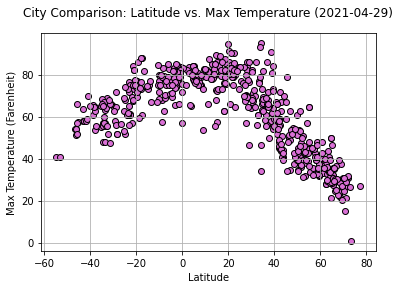

In [11]:
lattempscatter = clean_city_data[['City','Lat','Max Temp']]
plt.scatter(lattempscatter['Lat'],lattempscatter['Max Temp'],c='orchid',edgecolors='black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.title(f'City Comparison: Latitude vs. Max Temperature ({retrievedate})', y=1.05)
plt.savefig('output_images/all_latvstemp.png')
plt.show()

This plot shows how the temperature in Farenheit changes according to the change in latitude. Each point in the graph represents one of the cities. The code takes the values from the DataFrame and graphs them as a scatter, giving a visual representation between the two variables.

## Latitude vs. Humidity Plot

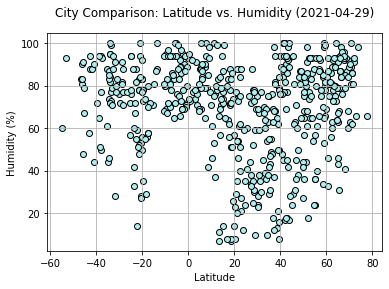

In [12]:
humtempscatter = clean_city_data[['City','Lat','Humidity']]
plt.scatter(humtempscatter['Lat'],humtempscatter['Humidity'],
            c='paleturquoise',edgecolors='black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f'City Comparison: Latitude vs. Humidity ({retrievedate})', y=1.05)
plt.savefig('output_images/all_latvshum.png')
plt.show()

This plot shows how the humidity percentage changes according to the change in latitude. Each point in the graph represents one of the cities. The code takes the values from the DataFrame and graphs them as a scatter, giving a visual representation between the two variables.

## Latitude vs. Cloudiness Plot

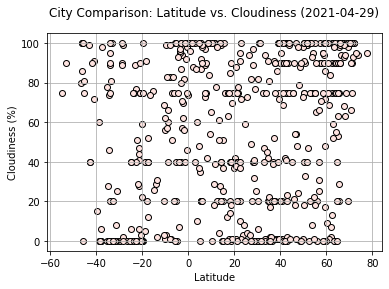

In [13]:
clotempscatter = clean_city_data[['City','Lat','Cloudiness']]
plt.scatter(clotempscatter['Lat'],clotempscatter['Cloudiness'],
            c='mistyrose',edgecolors='black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f'City Comparison: Latitude vs. Cloudiness ({retrievedate})', y=1.05)
plt.savefig('output_images/all_latvscloud.png')
plt.show()

This plot shows how the cloudiness percentage changes according to the change in latitude. Each point in the graph represents one of the cities. The code takes the values from the DataFrame and graphs them as a scatter, giving a visual representation between the two variables.

## Latitude vs. Wind Speed Plot

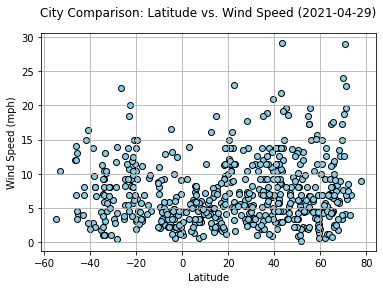

In [14]:
wsptempscatter = clean_city_data[['City','Lat','Wind Speed']]
plt.scatter(wsptempscatter['Lat'],wsptempscatter['Wind Speed'],
            c='skyblue',edgecolors='black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f'City Comparison: Latitude vs. Wind Speed ({retrievedate})', y=1.05)
plt.savefig('output_images/all_latvswind.png')
plt.show()

This plot shows how wind speeds change according to the change in latitude. Each point in the graph represents one of the cities. The code takes the values from the DataFrame and graphs them as a scatter, giving a visual representation between the two variables.

## Linear Regression

In [15]:
# Get northern hemisphere dataframe
north_df = clean_city_data[clean_city_data['Lat'] >= 0]
# Get southern hemisphere dataframe
south_df = clean_city_data[clean_city_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

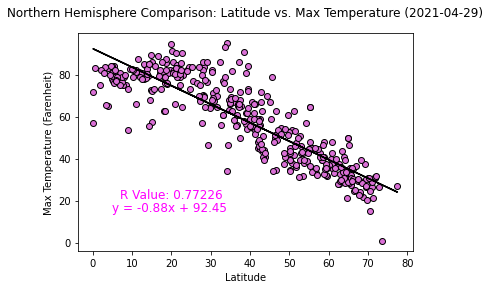

R Value: 0.77226


In [16]:
x_values = north_df['Lat']
y_values = north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c='orchid',edgecolors='black')
plt.plot(x_values,regress_values,"black")
plt.annotate(line_eq,(5,15),fontsize=12,color="magenta")
plt.annotate(f'R Value: {(rvalue**2).round(5)}',(7,21),fontsize=12,color="magenta")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.title(f'Northern Hemisphere Comparison: Latitude vs. Max Temperature ({retrievedate})', y=1.05)
plt.savefig('output_images/north_latvstemp.png')
plt.show()
print(f'R Value: {(rvalue**2).round(5)}')

This plot shows how the temperature in Farenheit changes according to the change in latitude, only considering the Northern Hemisphere. Each point in the graph represents one of the cities. According to the graph, there is a correlation between temperature and latitude in this hemisphere: the higher the latitude, the less the temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

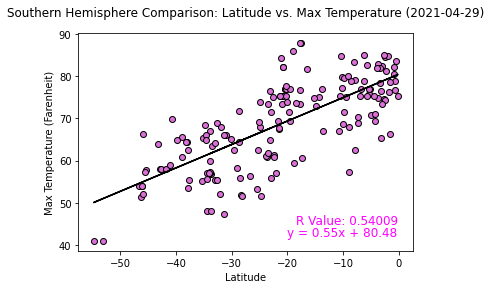

R Value: 0.54009


In [17]:
x_values = south_df['Lat']
y_values = south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c='orchid',edgecolors='black')
plt.plot(x_values,regress_values,"black")
plt.annotate(line_eq,(-20,42),fontsize=12,color="magenta")
plt.annotate(f'R Value: {(rvalue**2).round(5)}',(-18.5,45),fontsize=12,color="magenta")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.title(f'Southern Hemisphere Comparison: Latitude vs. Max Temperature ({retrievedate})', y=1.05)
plt.savefig('output_images/south_latvstemp.png')
plt.show()
print(f'R Value: {(rvalue**2).round(5)}')

This plot shows how the temperature in Farenheit changes according to the change in latitude, only considering the Southern Hemisphere. Each point in the graph represents one of the cities. According to the graph, there is a correlation between temperature and latitude in this hemisphere: the higher the latitude, the higher the temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

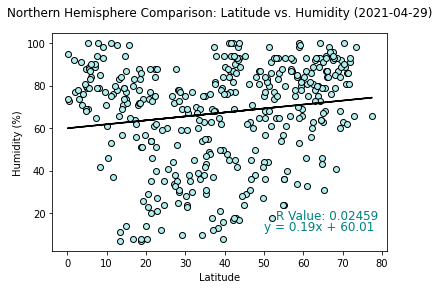

R Value: 0.02459


In [18]:
x_values = north_df['Lat']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c='paleturquoise',edgecolors='black')
plt.plot(x_values,regress_values,"black")
plt.annotate(line_eq,(50,12),fontsize=12,color="teal")
plt.annotate(f'R Value: {(rvalue**2).round(5)}',(53,17),fontsize=12,color="teal")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f'Northern Hemisphere Comparison: Latitude vs. Humidity ({retrievedate})', y=1.05)
plt.savefig('output_images/north_latvshum.png')
plt.show()
print(f'R Value: {(rvalue**2).round(5)}')

This plot shows how the humidity changes according to the change in latitude, only considering the Northern Hemisphere. Each point in the graph represents one of the cities. According to the graph, there is a not a correlation between the variables.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

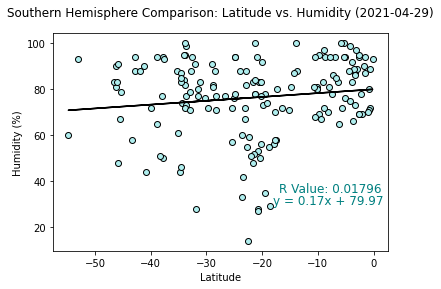

R Value: 0.01796


In [19]:
x_values = south_df['Lat']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c='paleturquoise',edgecolors='black')
plt.plot(x_values,regress_values,"black")
plt.annotate(line_eq,(-18,30),fontsize=12,color="teal")
plt.annotate(f'R Value: {(rvalue**2).round(5)}',(-17,35),fontsize=12,color="teal")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f'Southern Hemisphere Comparison: Latitude vs. Humidity ({retrievedate})', y=1.05)
plt.savefig('output_images/south_latvshum.png')
plt.show()
print(f'R Value: {(rvalue**2).round(5)}')

This plot shows how the humidity changes according to the change in latitude, only considering the Southern Hemisphere. Each point in the graph represents one of the cities. According to the graph, there is a not a correlation between the variables.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

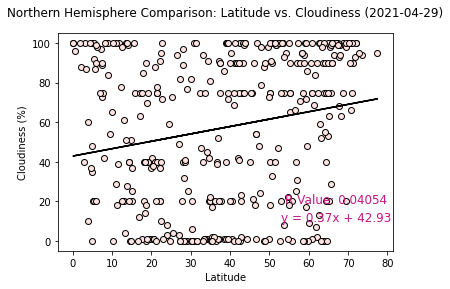

R Value: 0.04054


In [20]:
x_values = north_df['Lat']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c='mistyrose',edgecolors='black')
plt.plot(x_values,regress_values,"black")
plt.annotate(line_eq,(53,10),fontsize=12,color="mediumvioletred")
plt.annotate(f'R Value: {(rvalue**2).round(5)}',(54,19),fontsize=12,color="mediumvioletred")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f'Northern Hemisphere Comparison: Latitude vs. Cloudiness ({retrievedate})', y=1.05)
plt.savefig('output_images/north_latvscloud.png')
plt.show()
print(f'R Value: {(rvalue**2).round(5)}')

This plot shows how the cloudiness of a city changes according to the change in latitude, only considering the Northern Hemisphere. Each point in the graph represents one of the cities. According to the graph, there is a not a correlation between the variables.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

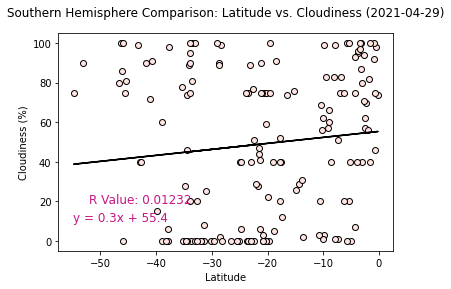

R Value: 0.01232


In [21]:
x_values = south_df['Lat']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c='mistyrose',edgecolors='black')
plt.plot(x_values,regress_values,"black")
plt.annotate(line_eq,(-55,10),fontsize=12,color="mediumvioletred")
plt.annotate(f'R Value: {(rvalue**2).round(5)}',(-52,19),fontsize=12,color="mediumvioletred")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f'Southern Hemisphere Comparison: Latitude vs. Cloudiness ({retrievedate})', y=1.05)
plt.savefig('output_images/south_latvscloud.png')
plt.show()
print(f'R Value: {(rvalue**2).round(5)}')

This plot shows how the cloudiness of a city changes according to the change in latitude, only considering the Southern Hemisphere. Each point in the graph represents one of the cities. According to the graph, there is a not a correlation between the variables.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

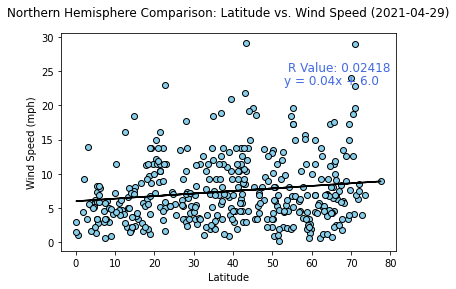

R Value: 0.02418


In [22]:
x_values = north_df['Lat']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c='skyblue',edgecolors='black')
plt.plot(x_values,regress_values,"black")
plt.annotate(line_eq,(53,23),fontsize=12,color="royalblue")
plt.annotate(f'R Value: {(rvalue**2).round(5)}',(54,25),fontsize=12,color="royalblue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f'Northern Hemisphere Comparison: Latitude vs. Wind Speed ({retrievedate})', y=1.05)
plt.savefig('output_images/north_latvswind.png')
plt.show()
print(f'R Value: {(rvalue**2).round(5)}')

This plot shows how the wind speed changes according to the change in latitude, only considering the Northern Hemisphere. Each point in the graph represents one of the cities. According to the graph, there is a not a correlation between the variables.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

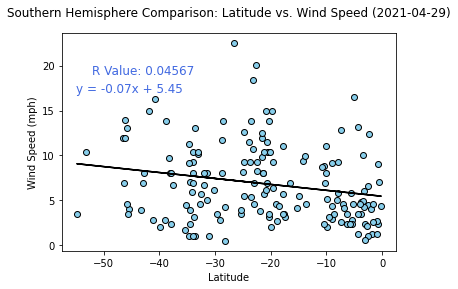

R Value: 0.04567


In [24]:
x_values = south_df['Lat']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c='skyblue',edgecolors='black')
plt.plot(x_values,regress_values,"black")
plt.annotate(line_eq,(-55,17),fontsize=12,color="royalblue")
plt.annotate(f'R Value: {(rvalue**2).round(5)}',(-52,19),fontsize=12,color="royalblue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f'Southern Hemisphere Comparison: Latitude vs. Wind Speed ({retrievedate})', y=1.05)
plt.savefig('output_images/south_latvswind.png')
plt.show()
print(f'R Value: {(rvalue**2).round(5)}')

This plot shows how the wind speed changes according to the change in latitude, only considering the Southern Hemisphere. Each point in the graph represents one of the cities. According to the graph, there is a not a correlation between the variables.